In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
industry_portfolios = pd.read_excel('Industry_Portfolios.xlsx', index_col = 0)

D:\anaconda\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [4]:
industry_portfolios_mean = np.array(industry_portfolios.mean())
pd.DataFrame(industry_portfolios_mean, index=industry_portfolios.columns, columns = ['Mean'])

,Mean
NoDur,0.902833
Durbl,0.733333
Manuf,1.012833
Enrgy,1.231167
HiTec,0.766250
Telcm,0.881417
Shops,0.916333
Hlth,0.783833
Utils,0.907167
Other,0.489083


In [5]:
industry_portfolios_mean_T = np.array(industry_portfolios.mean()).T
industry_portfolios_mean_T

array([0.90283333, 0.73333333, 1.01283333, 1.23116667, 0.76625   ,
       0.88141667, 0.91633333, 0.78383333, 0.90716667, 0.48908333])

In [6]:
industry_portfolios_stdev = np.array(industry_portfolios.std().T)
pd.DataFrame(industry_portfolios_stdev, index=industry_portfolios.columns, columns=['St.dev'])

,St.dev
NoDur,3.345657
Durbl,8.361852
Manuf,5.310270
Enrgy,6.081524
HiTec,5.381191
Telcm,4.448284
Shops,4.093786
Hlth,3.787172
Utils,3.701763
Other,5.582452


In [7]:
industry_portfolios_cov = np.array(industry_portfolios.cov())
industry_portfolios_cov

array([[11.19342216, 18.44966611, 14.10490703, 10.5313412 , 12.92294937,
        11.96807831, 10.17083232,  9.95311174,  7.86665347, 14.4384085 ],
       [18.44966611, 69.92057703, 39.1780972 , 27.0197944 , 35.4666521 ,
        27.49054314, 27.44473081, 16.82400308, 12.74613641, 39.36198711],
       [14.10490703, 39.1780972 , 28.19897006, 23.14537986, 24.61873929,
        19.55014973, 17.62286678, 13.59644703, 11.4406123 , 26.31342279],
       [10.5313412 , 27.0197944 , 23.14537986, 36.98493308, 19.26727584,
        15.36681682, 11.29780011,  9.63032658, 14.02716804, 18.32046915],
       [12.92294937, 35.4666521 , 24.61873929, 19.26727584, 28.95722027,
        18.70827342, 17.83711471, 13.25406408, 10.30418676, 23.85547048],
       [11.96807831, 27.49054314, 19.55014973, 15.36681682, 18.70827342,
        19.78722739, 14.16935566, 11.50659873, 10.99159564, 19.61083576],
       [10.17083232, 27.44473081, 17.62286678, 11.29780011, 17.83711471,
        14.16935566, 16.75908392, 10.17884947

In [8]:
cov_inverse = np.linalg.inv(industry_portfolios_cov)

In [9]:
cov_inverse_array = np.array(cov_inverse)
cov_inverse_array

array([[ 0.42987616,  0.02364299, -0.11228464,  0.02488242,  0.02109433,
        -0.06576008, -0.04881808, -0.11787242, -0.06302345, -0.01706207],
       [ 0.02364299,  0.09015004, -0.11170494,  0.01575693, -0.00555338,
        -0.00938045, -0.03305295,  0.03350381,  0.00998723, -0.02840085],
       [-0.11228464, -0.11170494,  0.53145685, -0.1108174 , -0.08616709,
        -0.03841071,  0.02407555, -0.02005282,  0.01293586, -0.10978581],
       [ 0.02488242,  0.01575693, -0.1108174 ,  0.07924561, -0.00377626,
         0.01130945,  0.01490084,  0.01260604, -0.045812  ,  0.01081068],
       [ 0.02109433, -0.00555338, -0.08616709, -0.00377626,  0.16225984,
        -0.02593953, -0.0651664 , -0.02309265,  0.00097481,  0.01523926],
       [-0.06576008, -0.00938045, -0.03841071,  0.01130945, -0.02593953,
         0.24932019, -0.04599885, -0.00167346, -0.07979059, -0.01417457],
       [-0.04881808, -0.03305295,  0.02407555,  0.01490084, -0.0651664 ,
        -0.04599885,  0.2923196 , -0.01206851

In [10]:
e = np.ones(10)

In [11]:
e_T = e.T

In [12]:
alpha = industry_portfolios_mean@cov_inverse@e
alpha

0.1379432386993189

In [13]:
zeta = industry_portfolios_mean_T@cov_inverse@industry_portfolios_mean
zeta

0.19640858464482275

In [14]:
delta = e_T@cov_inverse@e
delta 

0.1373875973567117

In [15]:
rmv = alpha/delta

In [16]:
var_p = np.linspace(0, 2, 200 )
var_p

array([0.        , 0.01005025, 0.0201005 , 0.03015075, 0.04020101,
       0.05025126, 0.06030151, 0.07035176, 0.08040201, 0.09045226,
       0.10050251, 0.11055276, 0.12060302, 0.13065327, 0.14070352,
       0.15075377, 0.16080402, 0.17085427, 0.18090452, 0.19095477,
       0.20100503, 0.21105528, 0.22110553, 0.23115578, 0.24120603,
       0.25125628, 0.26130653, 0.27135678, 0.28140704, 0.29145729,
       0.30150754, 0.31155779, 0.32160804, 0.33165829, 0.34170854,
       0.35175879, 0.36180905, 0.3718593 , 0.38190955, 0.3919598 ,
       0.40201005, 0.4120603 , 0.42211055, 0.4321608 , 0.44221106,
       0.45226131, 0.46231156, 0.47236181, 0.48241206, 0.49246231,
       0.50251256, 0.51256281, 0.52261307, 0.53266332, 0.54271357,
       0.55276382, 0.56281407, 0.57286432, 0.58291457, 0.59296482,
       0.60301508, 0.61306533, 0.62311558, 0.63316583, 0.64321608,
       0.65326633, 0.66331658, 0.67336683, 0.68341709, 0.69346734,
       0.70351759, 0.71356784, 0.72361809, 0.73366834, 0.74371

In [17]:
def var_of_return(x):
    return (1/delta) + [delta/(zeta*delta - alpha*alpha)]*(x-rmv)**2

In [18]:
a = var_of_return(var_p)
a

array([24.68757549, 24.34080171, 23.99751651, 23.6577199 , 23.32141187,
       22.98859243, 22.65926157, 22.3334193 , 22.01106561, 21.69220051,
       21.37682399, 21.06493606, 20.75653671, 20.45162595, 20.15020378,
       19.85227019, 19.55782518, 19.26686876, 18.97940093, 18.69542168,
       18.41493101, 18.13792893, 17.86441544, 17.59439053, 17.32785421,
       17.06480647, 16.80524732, 16.54917675, 16.29659477, 16.04750137,
       15.80189656, 15.55978033, 15.32115269, 15.08601363, 14.85436316,
       14.62620128, 14.40152798, 14.18034326, 13.96264713, 13.74843958,
       13.53772063, 13.33049025, 13.12674846, 12.92649526, 12.72973064,
       12.5364546 , 12.34666716, 12.16036829, 11.97755802, 11.79823632,
       11.62240322, 11.45005869, 11.28120276, 11.1158354 , 10.95395664,
       10.79556646, 10.64066486, 10.48925185, 10.34132742, 10.19689158,
       10.05594433,  9.91848566,  9.78451557,  9.65403407,  9.52704116,
        9.40353683,  9.28352109,  9.16699393,  9.05395536,  8.94

In [19]:
sqrt_a = np.sqrt(a)
sqrt_a

array([4.96865933, 4.9336398 , 4.89872601, 4.86392022, 4.82922477,
       4.79464205, 4.76017453, 4.72582472, 4.69159521, 4.65748865,
       4.62350776, 4.58965533, 4.55593423, 4.52234739, 4.48889784,
       4.45558865, 4.422423  , 4.38940415, 4.35653543, 4.32382026,
       4.29126217, 4.25886475, 4.22663169, 4.19456679, 4.16267393,
       4.13095709, 4.09942036, 4.06806794, 4.03690411, 4.00593327,
       3.97515994, 3.94458874, 3.9142244 , 3.88407179, 3.85413585,
       3.82442169, 3.79493452, 3.76567965, 3.73666257, 3.70788883,
       3.67936416, 3.65109439, 3.62308549, 3.59534355, 3.56787481,
       3.54068561, 3.51378246, 3.48717196, 3.46086088, 3.43485608,
       3.40916459, 3.38379354, 3.35875018, 3.3340419 , 3.30967621,
       3.28566073, 3.2620032 , 3.23871145, 3.21579344, 3.19325721,
       3.1711109 , 3.14936274, 3.12802103, 3.10709415, 3.08659054,
       3.06651868, 3.04688711, 3.0277044 , 3.00897912, 2.99071987,
       2.97293524, 2.9556338 , 2.93882407, 2.92251455, 2.90671

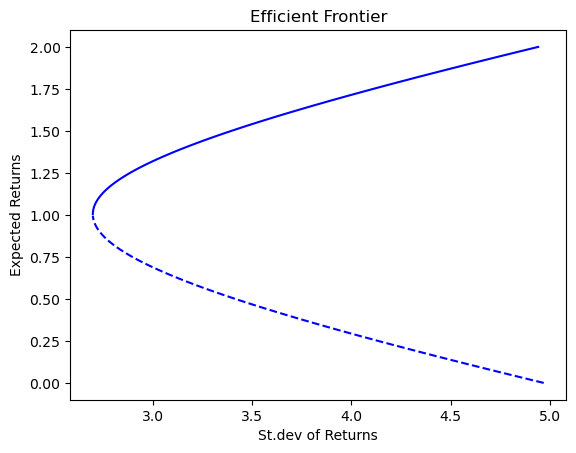

In [20]:
plt.plot(sqrt_a[var_p>=1], var_p[var_p>=1], color='blue')
plt.plot(sqrt_a[var_p<=1], var_p[var_p<=1], linestyle='--', color='blue')
plt.xlabel('St.dev of Returns')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [21]:
rfr = 0.13
def std_dev_return(x):
    return (x-rfr)**2/(zeta-2*alpha*rfr+delta*rfr**2)

In [22]:
std_dev_return(var_p)

array([1.03766801e-01, 8.83426468e-02, 7.41588754e-02, 6.12154862e-02,
       4.95124793e-02, 3.90498547e-02, 2.98276124e-02, 2.18457524e-02,
       1.51042747e-02, 9.60317921e-03, 5.34246606e-03, 2.32213519e-03,
       5.42186603e-04, 2.62030758e-06, 7.03436300e-04, 2.64463458e-03,
       5.82621515e-03, 1.02481780e-02, 1.59105231e-02, 2.28132506e-02,
       3.09563603e-02, 4.03398523e-02, 5.09637266e-02, 6.28279832e-02,
       7.59326220e-02, 9.02776432e-02, 1.05863047e-01, 1.22688832e-01,
       1.40755000e-01, 1.60061551e-01, 1.80608483e-01, 2.02395798e-01,
       2.25423495e-01, 2.49691575e-01, 2.75200037e-01, 3.01948881e-01,
       3.29938107e-01, 3.59167715e-01, 3.89637706e-01, 4.21348080e-01,
       4.54298835e-01, 4.88489973e-01, 5.23921493e-01, 5.60593395e-01,
       5.98505680e-01, 6.37658347e-01, 6.78051396e-01, 7.19684827e-01,
       7.62558641e-01, 8.06672837e-01, 8.52027416e-01, 8.98622376e-01,
       9.46457719e-01, 9.95533444e-01, 1.04584955e+00, 1.09740604e+00,
      

In [23]:
stdev_p = np.sqrt(std_dev_return(var_p))
stdev_p

array([3.22128547e-01, 2.97224909e-01, 2.72321272e-01, 2.47417635e-01,
       2.22513998e-01, 1.97610361e-01, 1.72706724e-01, 1.47803087e-01,
       1.22899449e-01, 9.79958122e-02, 7.30921751e-02, 4.81885379e-02,
       2.32849007e-02, 1.61873642e-03, 2.65223736e-02, 5.14260107e-02,
       7.63296479e-02, 1.01233285e-01, 1.26136922e-01, 1.51040559e-01,
       1.75944197e-01, 2.00847834e-01, 2.25751471e-01, 2.50655108e-01,
       2.75558745e-01, 3.00462382e-01, 3.25366019e-01, 3.50269657e-01,
       3.75173294e-01, 4.00076931e-01, 4.24980568e-01, 4.49884205e-01,
       4.74787842e-01, 4.99691480e-01, 5.24595117e-01, 5.49498754e-01,
       5.74402391e-01, 5.99306028e-01, 6.24209665e-01, 6.49113303e-01,
       6.74016940e-01, 6.98920577e-01, 7.23824214e-01, 7.48727851e-01,
       7.73631488e-01, 7.98535126e-01, 8.23438763e-01, 8.48342400e-01,
       8.73246037e-01, 8.98149674e-01, 9.23053311e-01, 9.47956948e-01,
       9.72860586e-01, 9.97764223e-01, 1.02266786e+00, 1.04757150e+00,
      

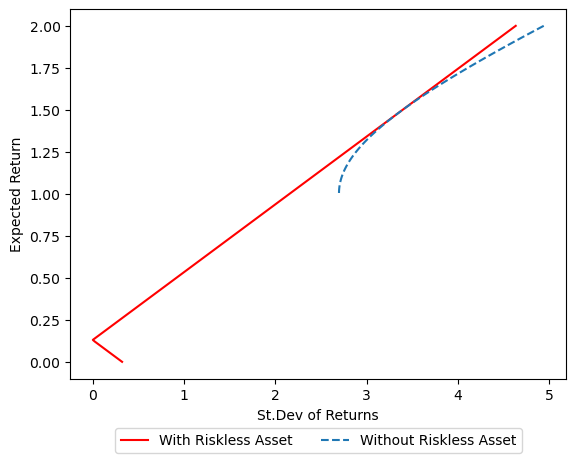

In [24]:
x = stdev_p
y = var_p
plt.plot(x, y, color = 'red', label = 'With Riskless Asset')
plt.plot(sqrt_a[var_p >=1], var_p[var_p >= 1], linestyle='--', label = 'Without Riskless Asset')
plt.xlabel('St.Dev of Returns')
plt.ylabel('Expected Return')
plt.legend(bbox_to_anchor=(0.5, -0.22), loc='lower center', ncols = 2)
plt.show()

In [25]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Place a legend on the Axes.
    
    Call signatures::
    
        legend()
        legend(handles, labels)
        legend(handles=handles)
        legend(labels)
    
    The call signatures correspond to the following different ways to use
    this method:
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()
    
    .. note::
        Specific artists can be excluded from the automatic leg

In [26]:
alpha

0.1379432386993189

In [27]:
delta

0.1373875973567117

In [28]:
zeta

0.19640858464482275

In [29]:
rfr

0.13

In [30]:
sharpe_ratio_var_p = np.sqrt((zeta) - 2*alpha*rfr + delta*(rfr**2))
sharpe_ratio_var_p

0.4035655993495088

In [31]:
R_tg = (alpha*rfr - zeta)/(delta*rfr - alpha)
R_tg
# Returns of tangency portfolio

1.4862735358446912

In [32]:
weightage = (
        [(delta*R_tg - alpha)/(zeta*delta - alpha*alpha)]*(cov_inverse_array@industry_portfolios_mean) +
        [(zeta - alpha*R_tg)/(zeta*delta - alpha*alpha)]*(cov_inverse_array@e)
    )
pd.DataFrame(weightage, index=industry_portfolios.columns, columns=['Weights'])
weightage

array([ 0.56797218, -0.2140726 ,  0.71410511,  0.10408719, -0.36343817,
       -0.09546326,  0.99164683,  0.0755702 ,  0.13264333, -0.91305081])

In [33]:
R_tg

1.4862735358446912

In [34]:
cov_inverse_array

array([[ 0.42987616,  0.02364299, -0.11228464,  0.02488242,  0.02109433,
        -0.06576008, -0.04881808, -0.11787242, -0.06302345, -0.01706207],
       [ 0.02364299,  0.09015004, -0.11170494,  0.01575693, -0.00555338,
        -0.00938045, -0.03305295,  0.03350381,  0.00998723, -0.02840085],
       [-0.11228464, -0.11170494,  0.53145685, -0.1108174 , -0.08616709,
        -0.03841071,  0.02407555, -0.02005282,  0.01293586, -0.10978581],
       [ 0.02488242,  0.01575693, -0.1108174 ,  0.07924561, -0.00377626,
         0.01130945,  0.01490084,  0.01260604, -0.045812  ,  0.01081068],
       [ 0.02109433, -0.00555338, -0.08616709, -0.00377626,  0.16225984,
        -0.02593953, -0.0651664 , -0.02309265,  0.00097481,  0.01523926],
       [-0.06576008, -0.00938045, -0.03841071,  0.01130945, -0.02593953,
         0.24932019, -0.04599885, -0.00167346, -0.07979059, -0.01417457],
       [-0.04881808, -0.03305295,  0.02407555,  0.01490084, -0.0651664 ,
        -0.04599885,  0.2923196 , -0.01206851

In [35]:
help(pd.DataFrame)

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Axes | None' = None, columns: 'Axes | None' = None, dtype: 'Dtype | None' = None, copy: 'bool | None' = None) -> 'None'
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order. If a dict contains Series
 |      which have an index defined, it is aligned by its index. This alignment also
 |      occurs if data i

In [36]:
industry_portfolios_mean

array([0.90283333, 0.73333333, 1.01283333, 1.23116667, 0.76625   ,
       0.88141667, 0.91633333, 0.78383333, 0.90716667, 0.48908333])